# P2 | Credit Card Revival

## 1.1 Introduction

This midbootcamp project will focus in a classification problem: as a risk analyst of a bank I will analyse and understand the demographics and other characteristics of the bank customer's that accept or reject a credit card offer, using logistic regression and KNN classifier model.

## 1.2 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pickle
import scikitplot as skplt
from imblearn.under_sampling import TomekLinks
import functions as func

## 1.3 Import data

In [2]:
data = pd.read_csv('creditcardmarketing.csv')

In [3]:
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


## 2. Explore & Cleaning data

### 2.1 Explore data

In [4]:
data.shape

(18000, 17)

In [5]:
data.dtypes

Customer Number           int64
Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

##### 2.1.1 Check null values:

In [6]:
func.check_null(data)

,percentage
Customer Number,0.000000
Offer Accepted,0.000000
Reward,0.000000
Mailer Type,0.000000
Income Level,0.000000
# Bank Accounts Open,0.000000
Overdraft Protection,0.000000
Credit Rating,0.000000
# Credit Cards Held,0.000000
# Homes Owned,0.000000


###### Note: As the columns with null values might be important to my model, I will not drop them and will deal with them later.

#### 2.1.2 Check duplicates

In [7]:
data.duplicated().sum()

0

##### Note: No action needed

#### 2.1.3 Statistics

In [8]:
data.describe().apply(lambda x: round(x,2))

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.00,18000.00,18000.0,18000.00,18000.00,17976.00,17976.00,17976.00,17976.00,17976.00
mean,9000.50,1.26,1.9,1.20,3.50,940.52,910.45,999.39,1042.03,810.19
std,5196.30,0.47,0.8,0.43,1.11,350.30,620.08,457.40,553.45,559.00
min,1.00,1.00,1.0,1.00,1.00,48.25,0.00,0.00,0.00,0.00
25%,4500.75,1.00,1.0,1.00,3.00,787.50,392.75,663.00,633.00,363.00
50%,9000.50,1.00,2.0,1.00,3.00,1007.00,772.00,1032.00,945.50,703.00
75%,13500.25,1.00,2.0,1.00,4.00,1153.25,1521.00,1342.00,1463.00,1212.00
max,18000.00,3.00,4.0,3.00,9.00,3366.25,3450.00,3421.00,3823.00,4215.00


#### 2.1.4 Unique values

I would like to see the unique values for each column:

In [9]:
func.unique_val(data)


Customer Number
[    1     2     3 ... 17998 17999 18000] 


Offer Accepted
['No' 'Yes'] 


Reward
['Air Miles' 'Cash Back' 'Points'] 


Mailer Type
['Letter' 'Postcard'] 


Income Level
['High' 'Medium' 'Low'] 


# Bank Accounts Open
[1 2 3] 


Overdraft Protection
['No' 'Yes'] 


Credit Rating
['High' 'Medium' 'Low'] 


# Credit Cards Held
[2 1 3 4] 


# Homes Owned
[1 2 3] 


Household Size
[4 5 2 6 3 1 8 9] 


Own Your Home
['No' 'Yes'] 


Average Balance
[1160.75  147.25  276.5  ...  691.   1649.   1427.25] 


Q1 Balance
[1669.   39.  367. ... 1122. 2139. 1070.] 


Q2 Balance
[ 877.  106.  352. ...   91. 1865. 1824.] 


Q3 Balance
[1095.   78.  145. ... 2265. 2045. 1037.] 


Q4 Balance
[1002.  366.  242. ... 1946. 2035. 2188.] 



### 2.2 Cleaning the data

#### 2.2.1 Headers

Cleaning column hearders: removing spaces and special characters (#)

In [10]:
data.columns = [column.lower().replace('# ', '').replace(' ','_') for column in data.columns]

In [11]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


#### 2.2.2 Exporting data to csv to be used in SQL part of the project

In [18]:
data.to_csv('/Users/ritasilva/P2-Credit-Card-Revival/data/credit_card_data.csv', index = False)

#### 2.2.3 Null values

I have decided to replace null values by the mean.

In [12]:
data[['average_balance', 'q1_balance','q2_balance', 'q3_balance', 'q4_balance']]=data[['average_balance', 'q1_balance','q2_balance', 'q3_balance', 'q4_balance']].fillna(value=data[['average_balance', 'q1_balance','q2_balance', 'q3_balance', 'q4_balance']].mean())


In [13]:
data.isnull().sum().sum()

0

#### 2.3.4 Index

Setting customer number as index, as it only has unique numbers.

In [14]:
data = data.set_index('customer_number')
data

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
customer_number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0


## 3. EDA

### 3.1. Checking imbalance of data

###### I would like to see the value count for each columns, therefore I've created a function for it. 

In [15]:
func.value_count(data)


offer_accepted
No     16977
Yes     1023
Name: offer_accepted, dtype: int64

reward
Air Miles    6061
Cash Back    5999
Points       5940
Name: reward, dtype: int64

mailer_type
Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64

income_level
Medium    9013
High      4526
Low       4461
Name: income_level, dtype: int64

overdraft_protection
No     15322
Yes     2678
Name: overdraft_protection, dtype: int64

credit_rating
High      6071
Medium    5972
Low       5957
Name: credit_rating, dtype: int64

own_your_home
Yes    11655
No      6345
Name: own_your_home, dtype: int64


Target variable (offer accepted) is imbalanced, I will deal with it later on.

### 3.2. Data distribution and outliers (numerical data)

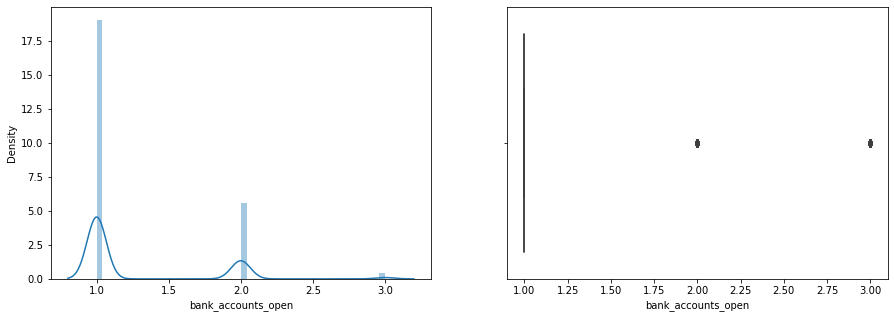

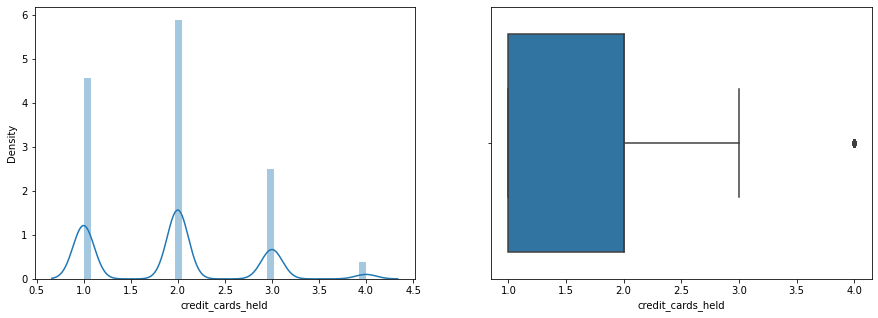

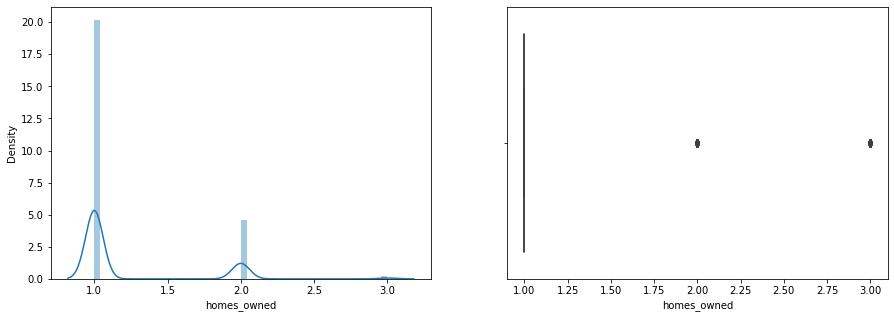

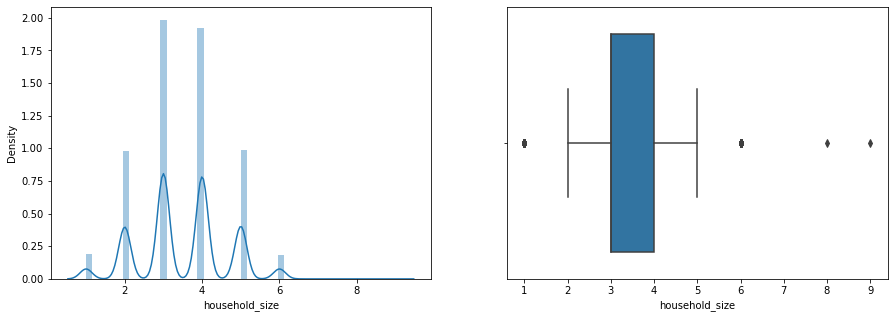

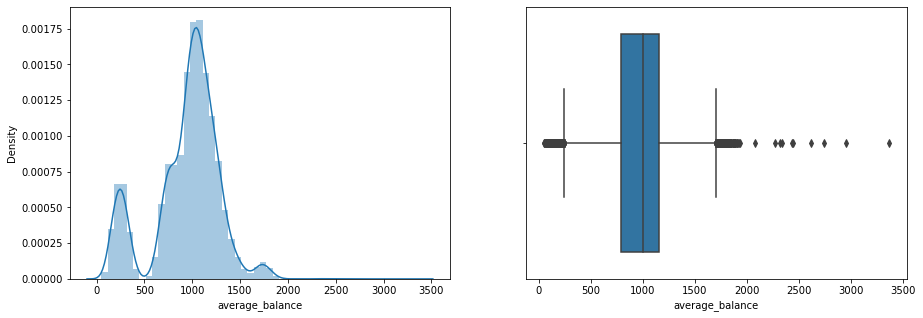

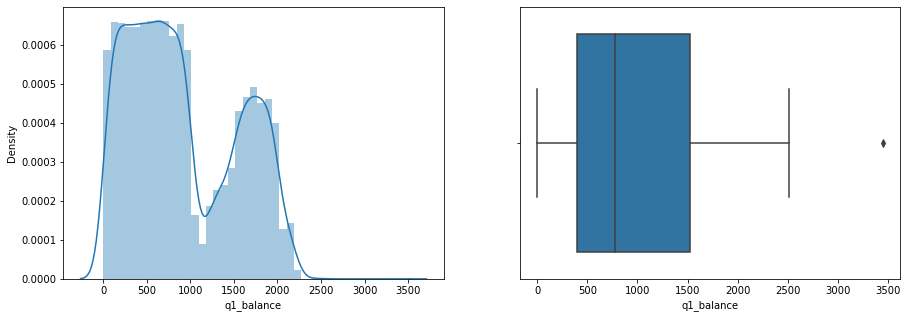

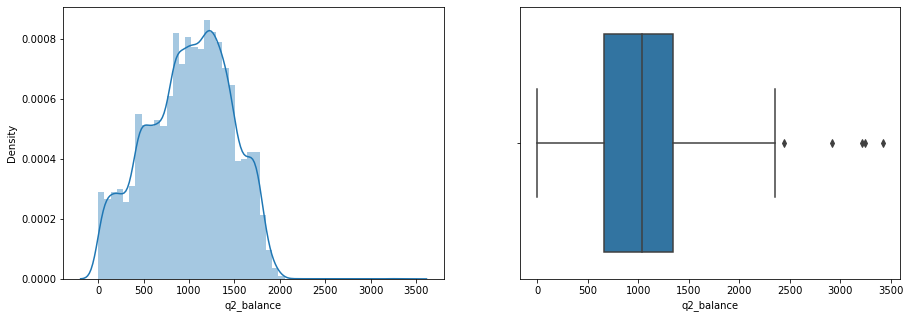

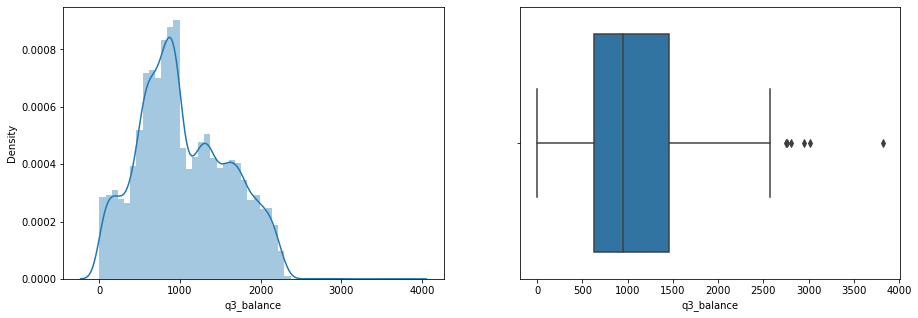

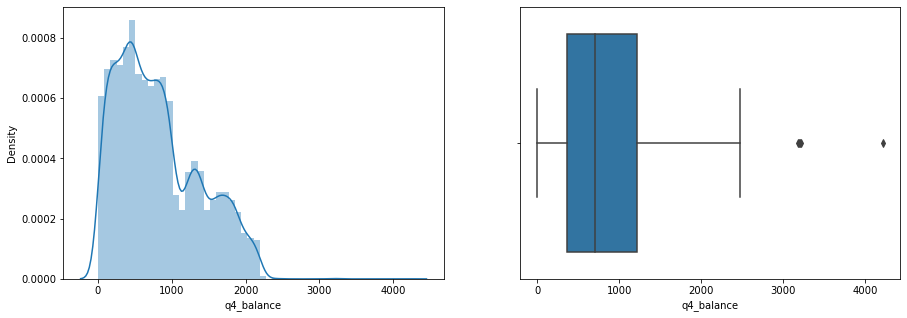

In [16]:
func.dist_boxplot_num(data)

Insights: Data is not normally distributed mainly for columns concerning the Balances and the same columns have the most outliers. I deal with these in the next part of the project.

### 3.3 Normal distribution

I want to apply boxcox tranformation to columns average_balance, q1_balance, q2_balance, q3_balance, q4_balance as the other columns have small numbers.

In [17]:
data, _ci = func.boxcox_transform(data, skip_columns = ['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size'])
data

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
customer_number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0


### 3.3 Dealing with outliers.

I will be removing the outliers only for columns average_balance, q1,q2,q3,q4_balance as these columns are the ones with the higher numbers and more outliers. The remaining columns have small values.

In [18]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
        return data

In [19]:
data = remove_outliers(data, threshold=1.5, skip_columns=['bank_accounts_open', 'credit_cards_held', 'homes_owned', 'household_size'])

For column household_size I will drop the outliers above 6 as there's only two rows (8 and 9).

In [20]:
data['household_size'].value_counts()

3    5712
4    5543
5    2853
2    2813
1     539
6     538
9       1
8       1
Name: household_size, dtype: int64

In [21]:
data = data[data['household_size'] < 8]

In [22]:
data['household_size'].value_counts()

3    5712
4    5543
5    2853
2    2813
1     539
6     538
Name: household_size, dtype: int64

### 3.4 Data distribution (categorical)

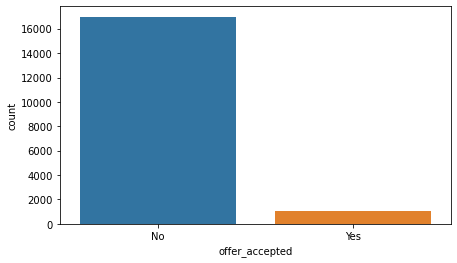

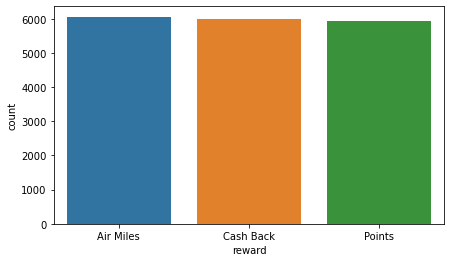

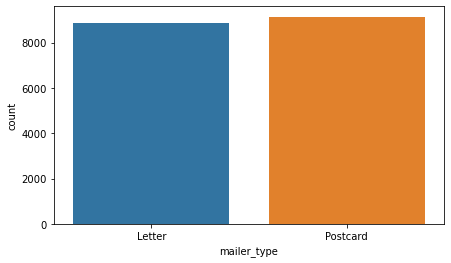

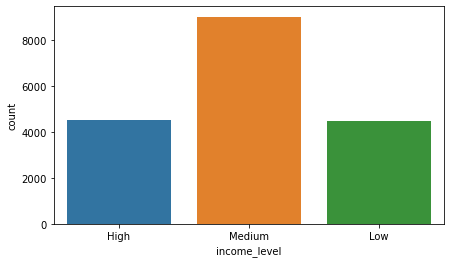

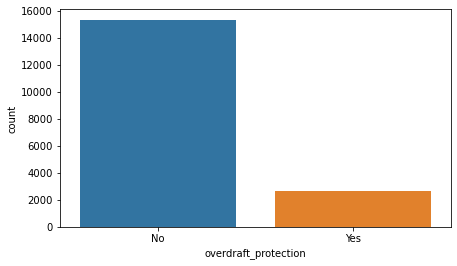

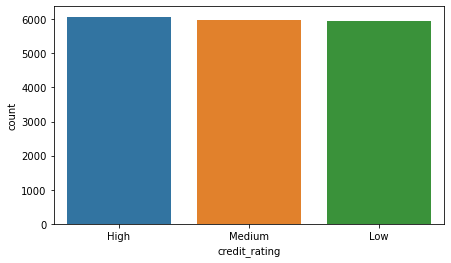

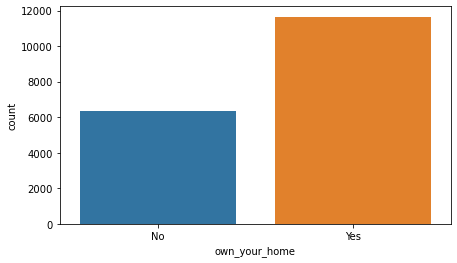

In [23]:
func.dist_cat(data)

Insights: As concluded before the data is imbalanced, target variable offer accepted is over represented with answer No.

### 3.5 Correlation

In [24]:
corr_df_model = data.select_dtypes([np.number])
correlations_matrix = corr_df_model.corr()  # method='spearman'
correlations_matrix

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
bank_accounts_open,1.000000,-0.001797,0.004814,0.008760,-0.003944,-0.002888,-0.007977,0.000185,-0.000338
credit_cards_held,-0.001797,1.000000,-0.002460,-0.002512,-0.003546,-0.009602,-0.007425,-0.007630,0.015393
homes_owned,0.004814,-0.002460,1.000000,0.005023,0.017803,0.013221,0.009591,0.007650,0.014536
household_size,0.008760,-0.002512,0.005023,1.000000,-0.003195,-0.004445,-0.008478,0.003723,0.000172
average_balance,-0.003944,-0.003546,0.017803,-0.003195,1.000000,0.481519,0.800226,0.752725,0.572289
q1_balance,-0.002888,-0.009602,0.013221,-0.004445,0.481519,1.000000,0.483161,-0.060995,-0.237325
q2_balance,-0.007977,-0.007425,0.009591,-0.008478,0.800226,0.483161,1.000000,0.487633,0.168738
q3_balance,0.000185,-0.007630,0.007650,0.003723,0.752725,-0.060995,0.487633,1.000000,0.565238
q4_balance,-0.000338,0.015393,0.014536,0.000172,0.572289,-0.237325,0.168738,0.565238,1.000000


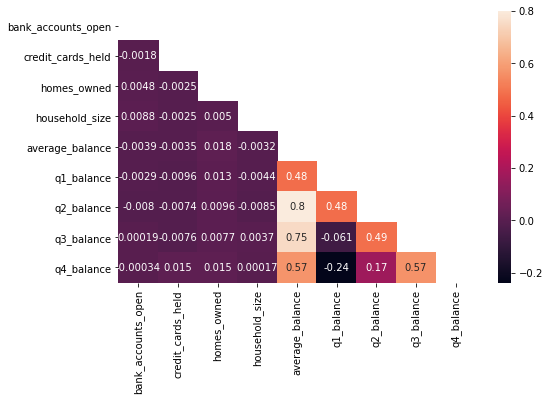

In [25]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


I've decided not to drop any columns based on this heatmap, as correlation is not that big.

##### Note: As concluded before the data is imbalanced, target variable offer accepted is over represented with answer No.

### 3.6 ChiSquare test

##### H0 (Null Hypothesis) - assumes that there is no association between the two variables.
##### Ha (Alternate Hypothesis) - assumes that there is an association between the two variables.

In [26]:
func.col_cat_val(data, columns= data.select_dtypes(np.object))

offer_accepted reward
(102.04701899203674, 6.930608686155016e-23, 2, array([[5715.88843205, 5658.35226136, 5601.75930659],
       [ 344.11156795,  340.64773864,  337.24069341]])) 

offer_accepted mailer_type
(170.553489976146, 5.601184507876806e-39, 1, array([[8350.29047672, 8625.70952328],
       [ 502.70952328,  519.29047672]])) 

offer_accepted income_level
(115.15347378840784, 9.879634564147586e-26, 2, array([[4267.10878987, 4207.68618735, 8501.20502278],
       [ 256.89121013,  253.31381265,  511.79497722]])) 

offer_accepted overdraft_protection
(0.20573113103447338, 0.6501340757973793, 1, array([[14451.01100122,  2524.98899878],
       [  869.98899878,   152.01100122]])) 

offer_accepted credit_rating
(441.9465103945487, 1.0777911659959284e-96, 2, array([[5726.26380709, 5616.8507612 , 5632.88543171],
       [ 344.73619291,  338.1492388 ,  339.11456829]])) 

offer_accepted own_your_home
(0.0063448436268292475, 0.9365120268975174, 1, array([[ 5982.81853539, 10993.18146461],
      

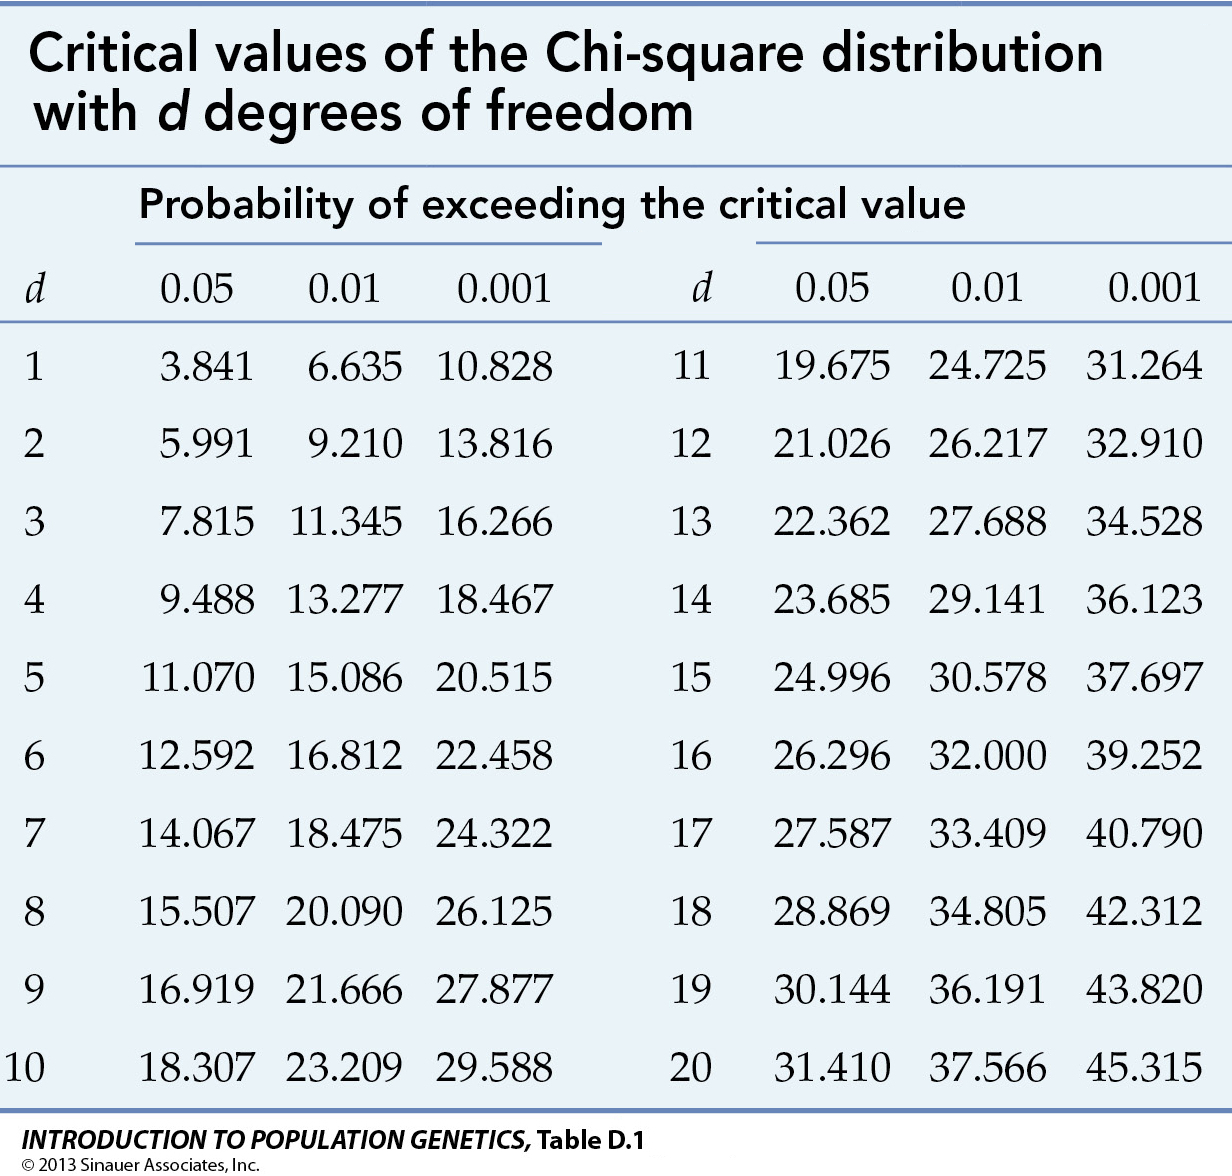

In [41]:
from IPython import display

display.Image("https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg", width=500, height=500)

Note: Added ChiSquareTest for information only and to get aqcuainted with it, as no decision was taken regarding the correlation between categorical variables.

## 4. Encoding categoricals

In [27]:
X = data.drop('offer_accepted', axis=1)
y = data['offer_accepted']

In [28]:
X = pd.get_dummies(X)
X.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,reward_Air Miles,...,income_level_High,income_level_Low,income_level_Medium,overdraft_protection_No,overdraft_protection_Yes,credit_rating_High,credit_rating_Low,credit_rating_Medium,own_your_home_No,own_your_home_Yes
customer_number,,,,,,,,,,,,,,,,,,,,,
1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,1,...,1,0,0,1,0,1,0,0,1,0
2,1,2,2,5,147.25,39.0,106.0,78.0,366.0,1,...,0,0,1,1,0,0,0,1,0,1
3,2,2,1,2,276.50,367.0,352.0,145.0,242.0,1,...,1,0,0,1,0,0,0,1,0,1
4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,1,...,0,0,1,1,0,1,0,0,1,0
5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,1,...,0,0,1,1,0,0,0,1,0,1


## 5. Train-test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 6. Data transformation

In [30]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [31]:
transformer = StandardScaler()
transformer.fit(X_train_num)

# saving in a pickle
with open('std_transformer.pickle', 'wb') as file:
    pickle.dump(transformer, file)
    
# loading from a pickle  
with open('std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_ = loaded_transformer.transform(X_train_num)
X_test_ = loaded_transformer.transform(X_test_num)


## 5. Models: Logistic regression & KNN

I will use the Logistic Regression and KNN Classifier models.
I have wrote two functions to call these two models together with confusion matrix, ROC and metrics reports. Functions can be found in the functions.py file in github repo.

### 5.1. Models with imbalanced data

#### 5.1.1. Logistic regression

0.9469444444444445


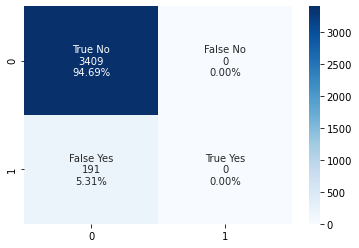

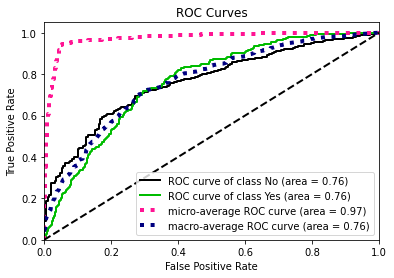

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      3409
         Yes       0.00      0.00      0.00       191

    accuracy                           0.95      3600
   macro avg       0.47      0.50      0.49      3600
weighted avg       0.90      0.95      0.92      3600



In [32]:
func.LogRegression(X_train, y_train, X_test, y_test)

Conclusion:
The model got a very high score 0.94 due to data imbalance. Precision, Recall and F1 Score for class Yes had a really bad score.

#### 5.1.2 KNN Classifier

Best value of K

In [33]:
scores = []
for i in range(2,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

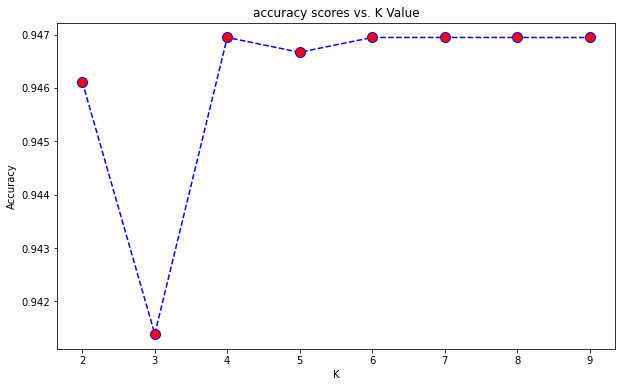

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

I will use k = 6 as it has a high accuracy score

0.9469444444444445


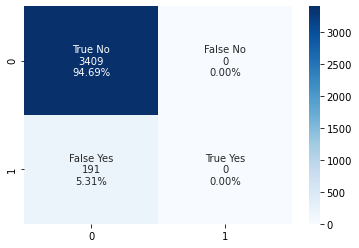

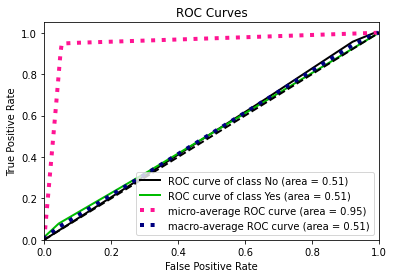

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      3409
         Yes       0.00      0.00      0.00       191

    accuracy                           0.95      3600
   macro avg       0.47      0.50      0.49      3600
weighted avg       0.90      0.95      0.92      3600



In [35]:
func.KNNClass(X_train, y_train, X_test, y_test, 6)

Conclusion: KNN Classifier did not perform better than the Logistic Regression model. Bad scores in predicting the minority class.

### 5.2. Models with methods dealing with data imbalance

#### 5.2.1 Logistic regression with Smote

In [36]:
smote = SMOTE()

X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)
y_train_smt.value_counts()

No     13567
Yes    13567
Name: offer_accepted, dtype: int64

0.9469444444444445


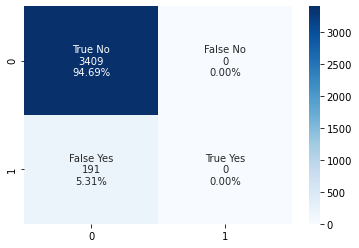

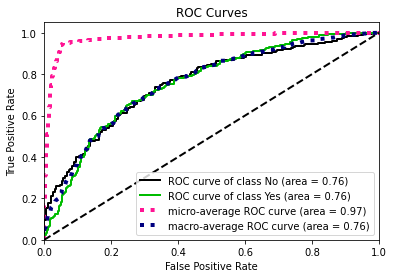

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      3409
         Yes       0.00      0.00      0.00       191

    accuracy                           0.95      3600
   macro avg       0.47      0.50      0.49      3600
weighted avg       0.90      0.95      0.92      3600



In [37]:
func.LogRegression (X_train_smt, y_train_smt, X_test, y_test)

Conclusion: Logistic Regression model did not perform better with SMOTE.

#### 5.2.2 KNN with SMOTE

Best value of K

In [38]:
scores = []
for i in range(2,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_smt, y_train_smt)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

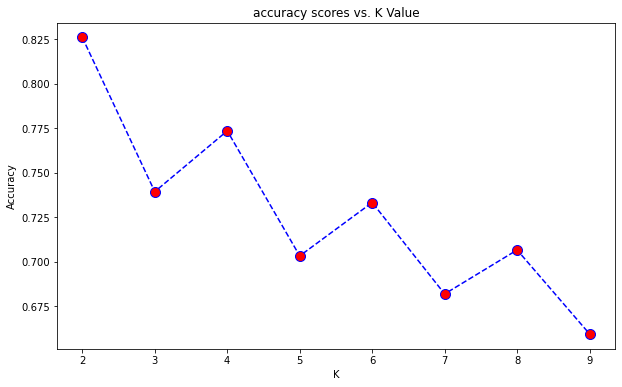

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Chose K=2 has it has the highest accuracy score

0.8261111111111111


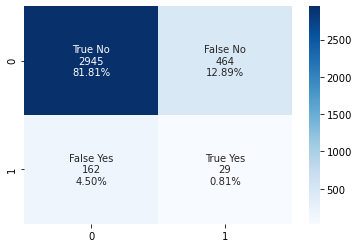

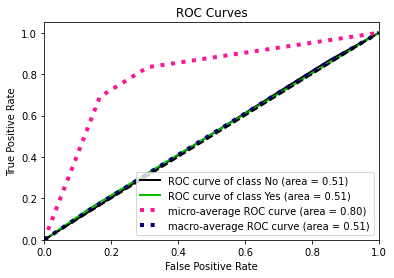

              precision    recall  f1-score   support

          No       0.95      0.86      0.90      3409
         Yes       0.06      0.15      0.08       191

    accuracy                           0.83      3600
   macro avg       0.50      0.51      0.49      3600
weighted avg       0.90      0.83      0.86      3600



In [40]:
func.KNNClass(X_train_smt, y_train_smt, X_test, y_test, 2)

Conclusion: With SMOTE, KNN performs abit better than Logistic Regression however still really low scores for precision recall and f1-score for the class Yes.

#### 5.2.3 Class weight: Balanced

In [41]:
classification = LogisticRegression(random_state=42, max_iter=10000, class_weight='balanced')
classification.fit(X_train, y_train)
classification.score(X_test, y_test)

0.6744444444444444

In [42]:
predictions = classification.predict(X_test)
predictions

array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [43]:
confusion_matrix(y_test, predictions)

array([[2288, 1121],
       [  51,  140]])

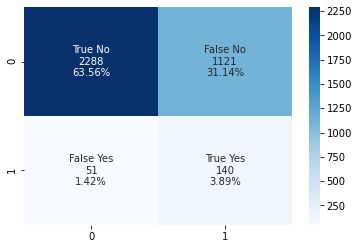

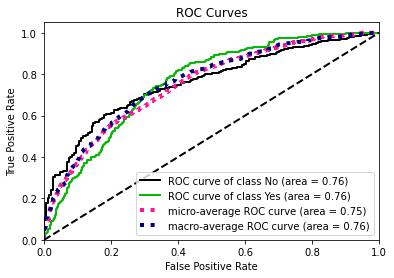

              precision    recall  f1-score   support

          No       0.98      0.67      0.80      3409
         Yes       0.11      0.73      0.19       191

    accuracy                           0.67      3600
   macro avg       0.54      0.70      0.49      3600
weighted avg       0.93      0.67      0.76      3600



In [44]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True No', 'False No', 'False Yes', 'True Yes']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## ROC

predicted_probas = classification.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

## report

print(metrics.classification_report(y_test, predictions))

Conclusion: So far it was the model that achieved better scores overall and specially in recall (when we want to get the most positives as possible).

#### 5.2.4 Logistic Regression with Upsampling

In [45]:
y_train

customer_number
15763    No
7305     No
2528     No
12286    No
1687     No
         ..
11287    No
11967    No
5393     No
863      No
15798    No
Name: offer_accepted, Length: 14398, dtype: object

In [46]:
y_train.value_counts()

No     13567
Yes      831
Name: offer_accepted, dtype: int64

In [47]:
ups_data = pd.concat([X_train, y_train], axis=1)

In [48]:
# getting sample with the same amount as the minority class
A = ups_data[ups_data['offer_accepted'] == 'No'].sample(13567) # doesn't need to be replaced
B = ups_data[ups_data['offer_accepted'] == 'Yes'].sample(13567, replace=True)


upsampled = pd.concat([A, B]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe
upsampled

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,reward_Air Miles,...,income_level_Low,income_level_Medium,overdraft_protection_No,overdraft_protection_Yes,credit_rating_High,credit_rating_Low,credit_rating_Medium,own_your_home_No,own_your_home_Yes,offer_accepted
customer_number,,,,,,,,,,,,,,,,,,,,,
2491,1,3,1,3,1158.00,1904.0,1391.0,961.0,376.0,1,...,0,1,1,0,0,1,0,0,1,Yes
6062,1,1,1,6,737.75,524.0,973.0,640.0,814.0,0,...,1,0,1,0,1,0,0,0,1,No
3306,1,2,1,6,739.25,706.0,593.0,783.0,875.0,0,...,1,0,1,0,1,0,0,1,0,No
6068,2,2,1,3,1415.00,957.0,1454.0,2189.0,1060.0,0,...,1,0,1,0,0,1,0,0,1,No
14290,2,1,2,2,868.50,1213.0,1278.0,796.0,187.0,0,...,0,1,1,0,0,0,1,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13477,1,2,1,4,1158.50,231.0,1650.0,1903.0,850.0,0,...,0,1,1,0,1,0,0,1,0,No
7745,1,3,1,4,778.25,774.0,820.0,927.0,592.0,1,...,1,0,1,0,1,0,0,1,0,No
5646,1,4,1,2,846.25,1525.0,1149.0,572.0,139.0,0,...,1,0,1,0,0,0,1,0,1,No


In [49]:
X_train_ups = upsampled.drop(['offer_accepted'], axis=1)
y_train_ups = upsampled['offer_accepted']

0.6713888888888889


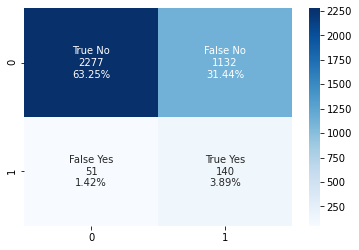

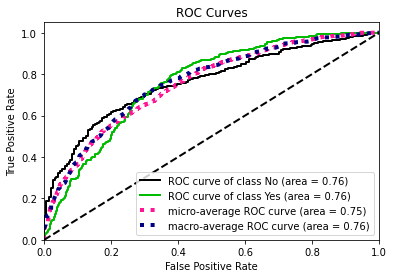

              precision    recall  f1-score   support

          No       0.98      0.67      0.79      3409
         Yes       0.11      0.73      0.19       191

    accuracy                           0.67      3600
   macro avg       0.54      0.70      0.49      3600
weighted avg       0.93      0.67      0.76      3600



In [300]:
LogRegression (X_train_ups, y_train_ups, X_test, y_test)

Conclusion: It performed a bit better in predicting Yes. Improved the F1-score.

#### 5.2.5 KNN with Upsampling

Best value of K

In [50]:
scores = []
for i in range(2,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_ups, y_train_ups)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

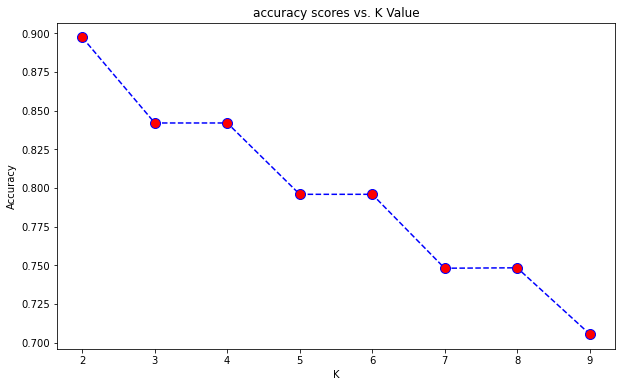

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

##Choosing k = 2 according to accuracy

0.8972222222222223


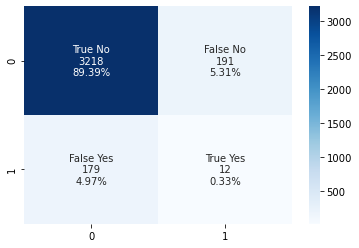

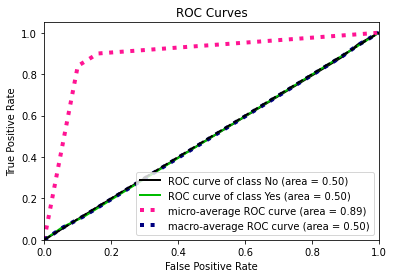

              precision    recall  f1-score   support

          No       0.95      0.94      0.95      3409
         Yes       0.06      0.06      0.06       191

    accuracy                           0.90      3600
   macro avg       0.50      0.50      0.50      3600
weighted avg       0.90      0.90      0.90      3600



In [53]:
func.KNNClass(X_train_ups, y_train_ups, X_test, y_test, 2)

Conclusion: KNN and up sampling did not perform well in predicting Yes, low scores overall.

#### 5.2.6 Logistic Regression with Tomek Links

In [54]:

# Tomek Links
# Pairs of almost similar rows from opposite classes.
# Removing the row of the majority class from each pair helps the classifier.

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X_train, y_train)
y_tl.value_counts()

No     13125
Yes      831
Name: offer_accepted, dtype: int64

0.9469444444444445


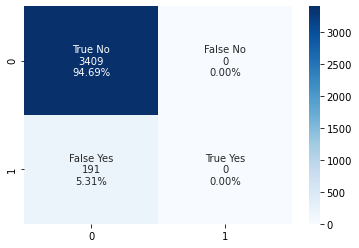

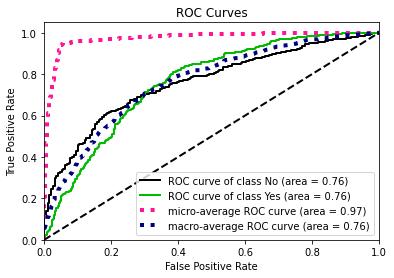

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      3409
         Yes       0.00      0.00      0.00       191

    accuracy                           0.95      3600
   macro avg       0.47      0.50      0.49      3600
weighted avg       0.90      0.95      0.92      3600



In [56]:
func.LogRegression(X_tl, y_tl, X_test, y_test)

Conclusion: Did not perform well, badly predicting Yes class.

#### 5.2.7 KNN with Tomek Links

Best value of K

In [57]:
scores = []
for i in range(2,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_tl, y_tl)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

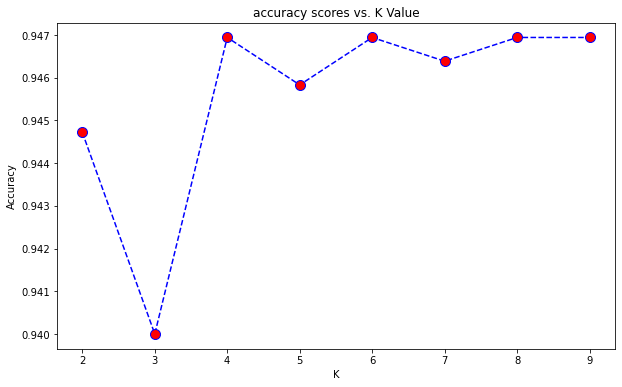

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

Choosing k = 8 according to accuracy

0.9469444444444445


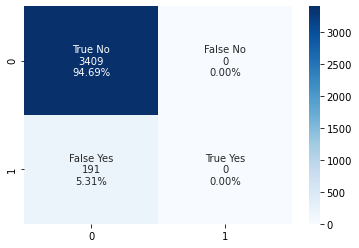

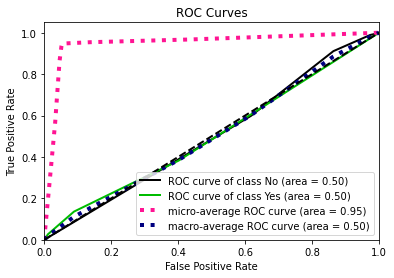

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      3409
         Yes       0.00      0.00      0.00       191

    accuracy                           0.95      3600
   macro avg       0.47      0.50      0.49      3600
weighted avg       0.90      0.95      0.92      3600



In [60]:
func.KNNClass(X_tl, y_tl, X_test, y_test, 8)

Conclusion: Did not perform well. Once more it could not predicy the Yes class.

## Final Considerations

Overall the models did not perform well. The models did not seem to improve after scaling the data nor with the data imbalanced tecnhiques used. The accuracy of the models was usually higher before any data imbalance tecnhiques. There's no evident difference between the perfomance of Logistic Regression vs KNN Classifier.

The model that performed better was the Logistic Regression with Up Sampling technique  and the Logistic Regression with Class weights.


|                                         | Accuracy | Yes-Precision | Yes-Recall | Yes-F1_Score | No-Precision | No-Recall | No-F1_Score |
|-----------------------------------------|:--------:|:-------------:|:----------:|:------------:|:------------:|:---------:|:-----------:|
| Logistic Regression with data imbalance |   0.95   |      0.00     |    0.00    |     0.00     |     0.95     |    1.00   |     0.97    |
| KNN Classifier with data imbalance      |   0.95   |      0.00     |    0.00    |     0.00     |     0.95     |    1.00   |     0.97    |
| Logistic Regression with SMOTE          |   0.95   |      0.00     |    0.00    |     0.00     |     0.95     |    1.0    |     0.97    |
| KNN Classifier with SMOTE               |   0.83   |      0.06     |    0.16    |     0.09     |     0.95     |    0.86   |     0.90    |
| Logistic Regression with Class weighs   |   0.67   |      0.11     |    0.73    |     0.19     |     0.98     |    0.67   |     0.80    |
| Logistic Regression with UpSampling     |   0.67   |      0.11     |    0.73    |     0.19     |     0.98     |    0.67   |     0.79    |
| KNN Classifier with UpSampling          |   0.90   |      0.06     |    0.06    |     0.06     |     0.95     |    0.94   |     0.95    |
| Logistic Regression with Tomek Links    |   0.95   |      0.00     |    0.00    |     0.00     |     0.95     |    1.00   |     0.97    |
| KNN Classifier with Tomek Links         |   0.95   |      0.00     |    0.00    |     0.00     |     0.95     |    1.00   |     0.97    |

##### Ideas to improve de model: use different data normalization techniques, try different models, make use of ChiSquareTest to check correlation between categorical variables, maybe drop columns concerning the balance of each quarter.

###### Thank you for you time! :) 